# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [313]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

needle length 0.1
MC mean probability 0.838 and standard deviation 0.012
analytical probability 0.064


/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


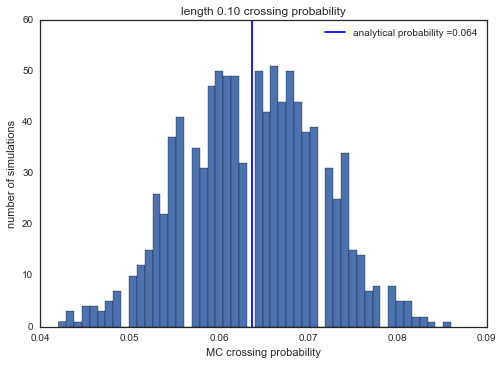

needle length 0.2
MC mean probability 0.064 and standard deviation 0.008
analytical probability 0.127


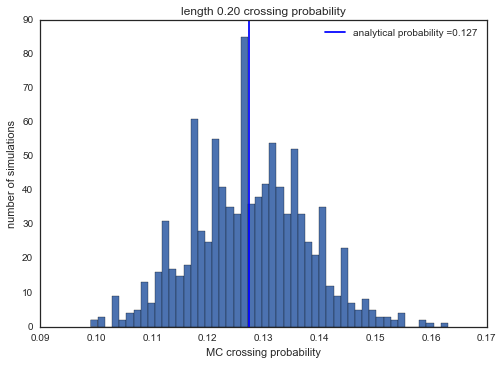

needle length 0.3
MC mean probability 0.128 and standard deviation 0.010
analytical probability 0.191


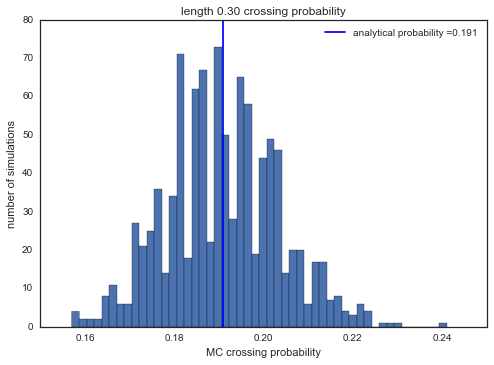

needle length 0.4
MC mean probability 0.191 and standard deviation 0.013
analytical probability 0.255


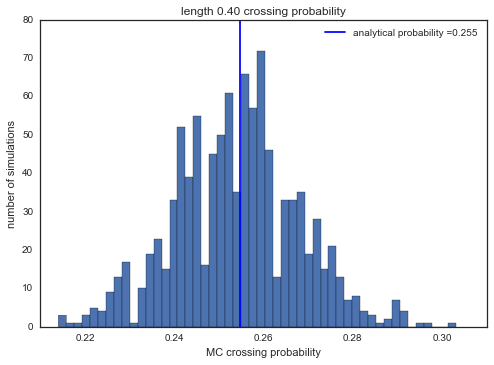

needle length 0.5
MC mean probability 0.254 and standard deviation 0.014
analytical probability 0.318


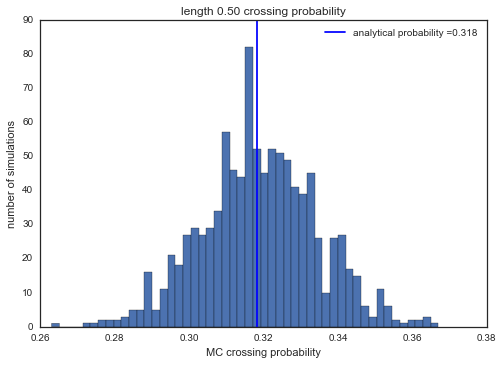

needle length 0.6
MC mean probability 0.319 and standard deviation 0.016
analytical probability 0.382


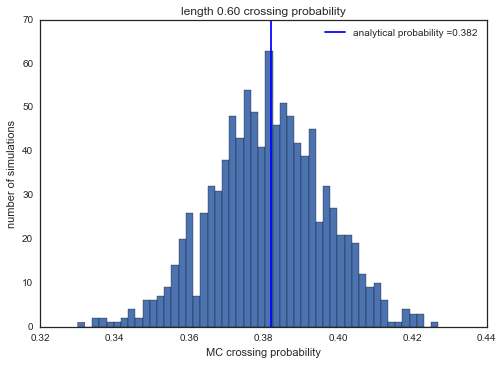

needle length 0.7
MC mean probability 0.381 and standard deviation 0.015
analytical probability 0.446


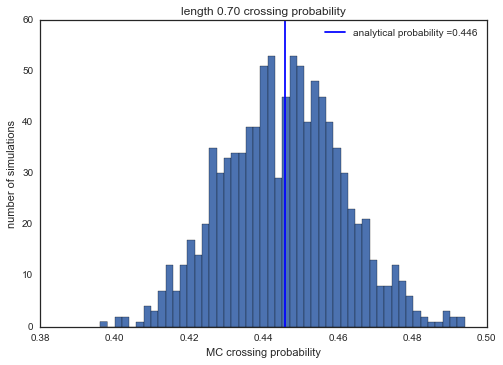

needle length 0.8
MC mean probability 0.445 and standard deviation 0.016
analytical probability 0.509


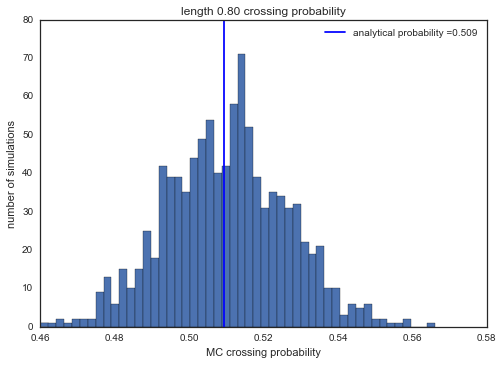

needle length 0.9
MC mean probability 0.510 and standard deviation 0.016
analytical probability 0.573


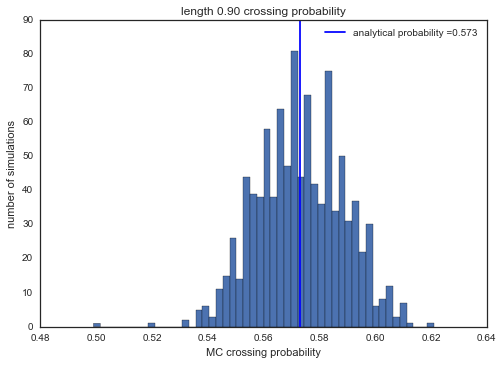

needle length 1.0
MC mean probability 0.573 and standard deviation 0.016
analytical probability 0.637


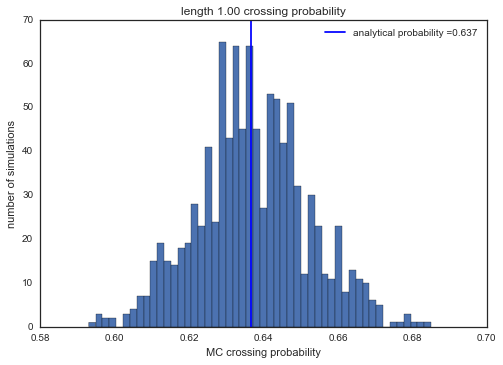

needle length 1.1
MC mean probability 0.637 and standard deviation 0.015
analytical probability 0.7


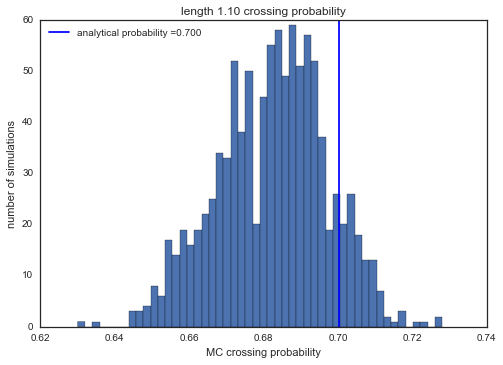

needle length 1.2
MC mean probability 0.682 and standard deviation 0.015
analytical probability 0.764


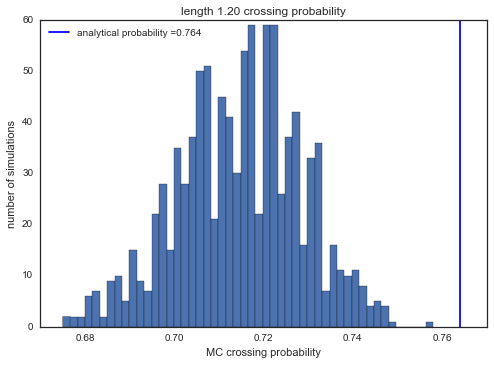

needle length 1.3
MC mean probability 0.715 and standard deviation 0.014
analytical probability 0.828


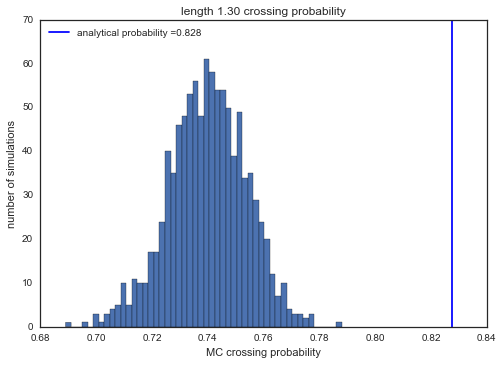

needle length 1.4
MC mean probability 0.740 and standard deviation 0.014
analytical probability 0.891


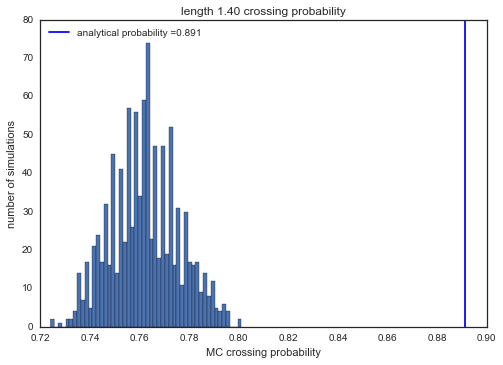

needle length 1.5
MC mean probability 0.762 and standard deviation 0.014
analytical probability 0.955


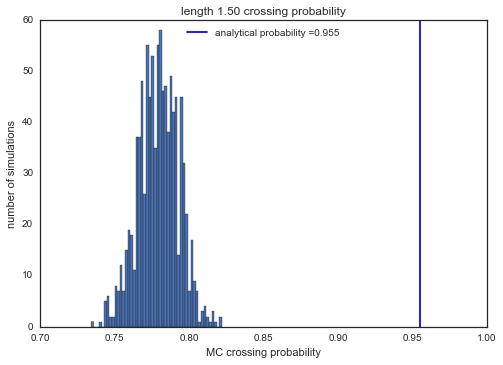

needle length 1.6
MC mean probability 0.779 and standard deviation 0.014
analytical probability 1.019


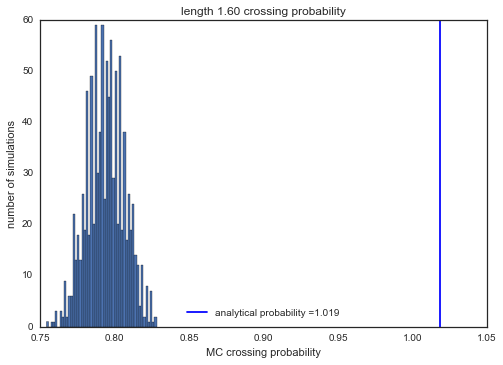

needle length 1.7
MC mean probability 0.794 and standard deviation 0.013
analytical probability 1.082


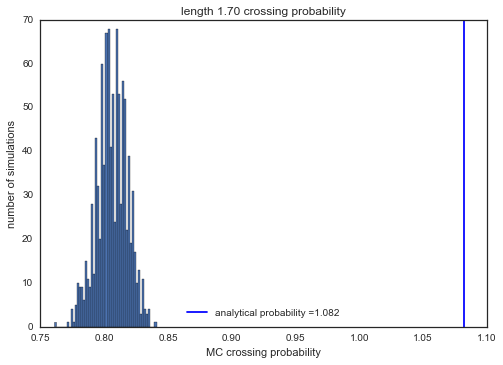

needle length 1.8
MC mean probability 0.806 and standard deviation 0.012
analytical probability 1.146


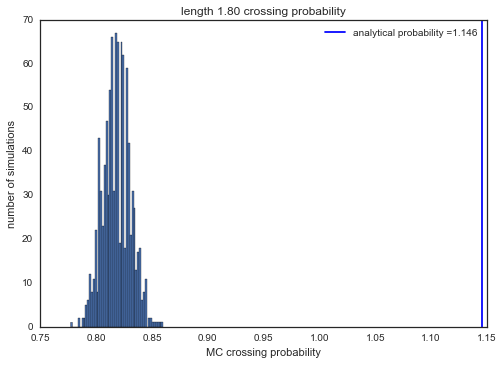

needle length 1.9
MC mean probability 0.818 and standard deviation 0.012
analytical probability 1.21


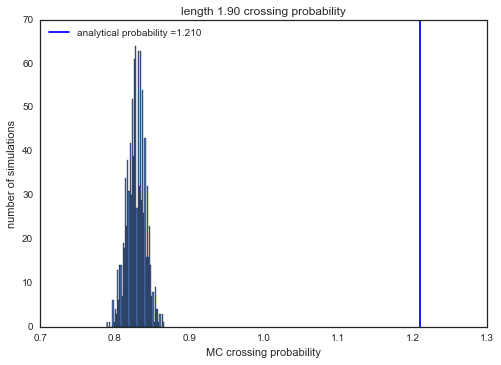

needle length 2.0
MC mean probability 0.829 and standard deviation 0.012
analytical probability 1.273


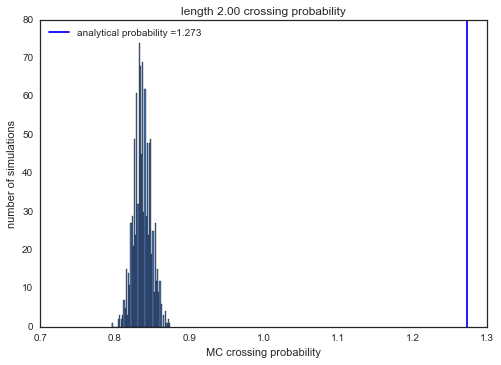

In [229]:
#number of MC simulations
n_simulations = 1000
#number of throws for each needle length in each simulation
n_total = 1000.0 

mc_means = []
mc_errors = [] #stdev
p_analyticals = []

#setup figure to draw the l
for i in range(1,21):
    
    l = i*0.1
        
    #crossing probabilities from MC simulations
    mc_probs = []
    
    for simulation in range(n_simulations):

        #x is shortest distance from midpoint to nearest line 
        #drawing x randomly uniformly between 0 and 0.5, 
        x = np.random.uniform(low=0, high=0.5, size=n_total)  

        #theta is the acute angle formed by needle and nearest line (0 <theta< pi/2)
        #drawing sin_theta randomly uniformly between 0 and 1,
        theta = np.random.uniform(low = 0, high = np.pi/2, size=n_total)

        #calculate 'a', the hypotenuse of the triangle with angle theta, where sin_theta = x/a
        a = x/np.sin(theta)

        #check if the needle crossed the line
        needle_crossed = l*0.5 >= a

        # sum up the throws that crossed the line
        n_crossed=np.sum(needle_crossed)

        # probabiilty of crossing the line is number of throws that crossed over total
        p_crossing = float(n_crossed)/n_total 

        mc_probs.append(p_crossing)
    
    # probability of crossing calculated analytically
    p_analytical = 2*l/np.pi
    
    print 'needle length',l
    print 'MC mean probability %.3f and standard deviation %.3f' %(mc_mean,mc_error)
    print 'analytical probability', round(p_analytical,3) 
    
    #draw histogram for each needle length
    plt.hist(mc_probs, bins = 50)
    plt.axvline(p_analytical, label ='analytical probability =%.3f' %p_analytical)
    plt.legend(loc='best')
    plt.title('length %.2f crossing probability' %l)
    plt.xlabel('MC crossing probability')
    plt.ylabel('number of simulations')
    plt.show()
    
    mc_mean = np.mean(mc_probs)
    mc_error = np.std(mc_probs)
    
    mc_means.append(mc_mean)
    mc_errors.append(mc_error)
    p_analyticals.append(p_analytical)
    

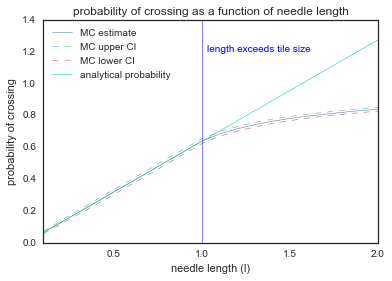

In [459]:
#plot showing errors 
plt.figure()
x = [0.1*i for i in range(1,21)]
upper_CI = map(lambda m,e: m+e, mc_means,mc_errors )
lower_CI = map(lambda m,e: m-e, mc_means,mc_errors )
plt.plot(x,mc_means, label='MC estimate', linewidth = 0.5)
plt.plot(x,upper_CI,'--', label='MC upper CI', linewidth = 0.5)
plt.plot(x,lower_CI, '--', label='MC lower CI', linewidth = 0.5)
plt.plot(x,p_analyticals, 'c', label= 'analytical probability', linewidth = 0.5)
plt.axvline(1, color= 'b', linewidth = 0.5)
plt.text(1.03,1.2, 'length exceeds tile size', color= 'b')
plt.legend(loc='best')
plt.xlabel('needle length (l)')
plt.ylabel('probability of crossing')
plt.title('probability of crossing as a function of needle length')
plt.xlim(0.1,2)

plt.show()

At $l \leq 1$ the true analytical solution from integration is within the confidence intervals of the MC estimate. However, at $l \geq 1$, we observe that the analytical solution diverges from the MC estimate. The higher analytical value is expected since when the needle length exceeds the tile length the integration setup changes. specifically the crossing condition is changed because the distance $x$ between the midpoint of the needle and the nearest tile line no longer characterizes the crossing conditions. We would have to break the integral into two parts, for different ranges of $\theta$.




# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


**Please answer this problem by adding cells here.**

In [170]:
def estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries):
    
    # upper and lower limits:
    a = lower_bound;    
    b = upper_bound; 
    
    estimates = np.zeros(number_of_tries)
    for simulation in range(number_of_tries):
        # use N samples
        N= number_of_samples

        #1. N values uniformly drawn from a to b 
        X = np.random.uniform(low=a, high=b, size=N) 

        #2. Compute f(X)
        Y = function_to_integrate(X)   
        # and the average
        f_average = np.sum(Y)/ N

        #3. estimate value of integral
        estimate = (b-a) * f_average;
        
        estimates[simulation] =estimate
        
    print "Monte Carlo mean estimate = ",np.mean(estimates)
    print "Monte Carlo std = ",np.std(estimates)

* $ \int_0^3 x^{\frac{x}{4}} \,dx$


In [171]:
# define f(x) for our integral
def f1(x):
    return x**(x/4)

estimate_integral_MC(f1, 0, 3, 10000, 1000)
   


Monte Carlo mean estimate =  3.91618037354
Monte Carlo std =  0.0118222165713


* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.

In [172]:
# define f(x) for our integral
def f2(x):
    return np.log(x)*np.log(1-x)

estimate_integral_MC(f2, 0, 1, 10000, 1000)


Monte Carlo mean estimate =  0.35507463637
Monte Carlo std =  0.00124861852463


The MC estimate for * $ \int_0^3 x^{\frac{x}{4}} \,dx$
 is 3.916 with 0.01182 error and the MC estimate for $ \int_0^1 \log x \cdot \log(1-x) \,dx $ is 0.3551 with a 0.001248 error. Whereas these integrals cannot be exactly solved, I chose the simulation number and sample size that minimize the error to get as accurate an estimate as possible.

# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

I assume the donut is standing with it's wider face on the x,y plane so that c= 3 and a = 1. I also assume that what is left of the donut is $x\leq 1$ and $y \geq -3$, assuming my roomate takes the smaller part at the first cut, and the smaller part at the second cut. We wish to find the percentage, by weight, of the donut left, so I calculate the original size to be $ (6\pi^2) $. I then estimate the part left by sampling points uniformly randomly from a 3D-rectangle that encloses the region of interest. I estimate that the donut weight left is 31.97 with a 1.162 error, so 54% of the donut is left!  

In [462]:
#define our f(x,y,z)
f_donut = lambda x,y,z: z**2 + (np.sqrt(x**2 + y**2)- 3)**2

# number of simulations
n_simulations = 1000

# use N draws 
N= 1000.0

#estimates
estimates = np.zeros(n_simulations)

for simulation in range(n_simulations):
    
    #sample X, Y and Z uniformly from a rectangle, the bounds on x and y determine the cuts
    X= np.random.uniform(low=-4, high=1, size=N) 
    Y= np.random.uniform(low=-3, high=4, size=N) 
    Z= np.random.uniform(low=-1, high=1, size=N) 

    #volume of the rectangle we are sampling from 
    vol = 5*7*2 

    # calculate f(x) 
    f_value = f_donut(X, Y, Z)  

    # reject all samples that do not satisfy our region condition
    f_average = np.sum(f_value<1) / N

    #multiply by the volume of the rectangle we are sampling from
    w_left =vol*f_average
    
    estimates[simulation] = w_left

#original weight since density = 1
w_original =round((np.pi**2)*6,2)

print "mean MC estimate = ", np.mean(estimates)
print "std MC estimate = ", np.std(estimates)
print 'Original wight = ', w_original
print 'Percent left for me = %.2f' %(np.mean(estimates)/w_original*100) 

mean MC estimate =  31.97628
std MC estimate =  1.16206237423
Original wight =  59.22
Percent left for me = 54.00


/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

Below is the plot the distribution 

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

The normalization factor was calculated to be 0.392.

normalization coefficient =  0.392


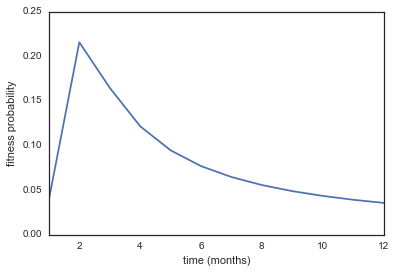

In [463]:
sum_p = 0
for t in range(1,13):
    sum_p += (t-0.9)/ ((t-1)**2 + 1)

norm = round(1/sum_p,4)

#plot the distribution
def get_prob(t):
    return norm*(t-0.9)/ ((t-1)**2 + 1)
t = range(1,13)
p_t = map(get_prob, t)
plt.plot(t,p_t)
plt.xlim(1,12)
plt.xlabel('time (months)')
plt.ylabel('fitness probability')

print 'normalization coefficient = ', norm

** Rejection Sampling**

* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution 


Total samples drawn:  1105957
Number of accepted samples:  100000
--- 3.00076985359 seconds ---


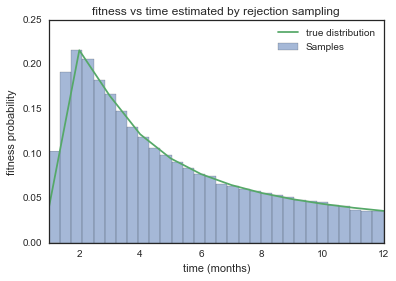

In [474]:
# execution time
start_time = time.time()

# domain limits
tmin = 1 # the lower limit of our domain
tmax = 12 # the upper limit of our domain

# range limit (supremum) for y
ymax = 1

N = 100000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax) (e.g. 0...10)
    t = np.random.uniform(tmin, tmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < get_prob(t):
        samples[accepted] = t
        accepted += 1
    
    count +=1
    
print "Total samples drawn: ",count
print "Number of accepted samples: ", accepted

# plot the histogram
plt.hist(samples,bins=30, label=u'Samples', alpha=0.5, normed=True);

# plot true distribution
t = range(1,13)
p_t = map(get_prob, t)
plt.plot(t,p_t, label ='true distribution')
plt.xlim(1,12)
plt.title('fitness vs time estimated by rejection sampling')
plt.xlabel('time (months)')
plt.ylabel('fitness probability')
plt.legend(loc='best')

print("--- %s seconds ---" % (time.time() - start_time))


Although less bins ruins the fit of the estimate to the true distribution, I repeat the histogram with less bins so it's comparable to the inverse transform estimate below.

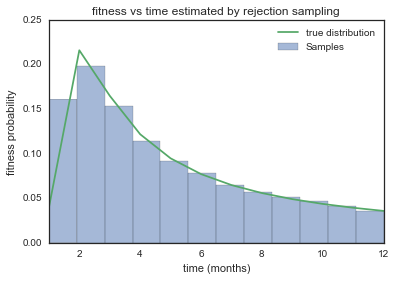

In [475]:
# plot the histogram
plt.hist(samples,bins=12, label=u'Samples', alpha=0.5, normed=True);

# plot true distribution
t = range(1,13)
p_t = map(get_prob, t)
plt.plot(t,p_t, label ='true distribution')
plt.xlim(1,12)
plt.title('fitness vs time estimated by rejection sampling')
plt.xlabel('time (months)')
plt.ylabel('fitness probability')
plt.legend(loc='best')

**Inverse Transform ** 

* Repeat the first two steps using the inverse transform instead of rejection sampling. 


(0, 1)

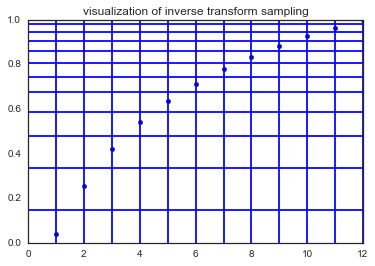

In [472]:
# this code creates the look up table and plots a visualization of inverse sampling.

# list indexed by t, each element is CDF at time t
CDF  = []
for t in range(1,13):
    CDF_t = 0
    for i in range(1,t+1):
        CDF_t += get_prob(i)
    CDF.append(CDF_t)
    
#get midpoints between each two months for lookup table
mid_CDF = [(CDF[t]+ CDF[t+1])*0.5 for t in range(len(CDF)-1)]

for i in range(len(mid_CDF)):
    plt.axhline(y=mid_CDF[i])
for i in range(1,13):
    plt.axvline(i)
plt.scatter(range(1,13),CDF)

plt.title('visualization of inverse transform sampling')
plt.xlim(0,12)
plt.ylim(0,1)

The plot above only helps me see how the intervals would be equal in size when I use the midpoints to sample from the discrete function.

--- 0.647433996201 seconds ---


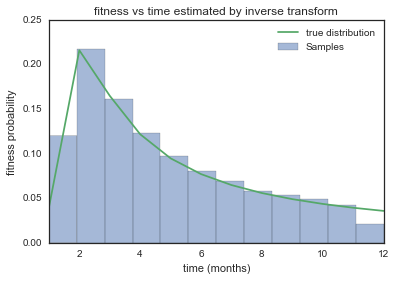

In [476]:
# get execution time 
start_time = time.time()

# domain limits
tmin = 1 # the lower limit of our domain
tmax = 12 # the upper limit of our domain

# range limits
rmin = CDF[tmin-1]
rmax = CDF[tmax-1]

N = 100000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(rmin, rmax, N)

#look up X corresponding to each R value sampled
samples = np.zeros(N)

for i in range(len(R)):
    for t in range(len(mid_CDF)):
        if R[i] <= mid_CDF[t]:
            samples[i] = t+1 # index 0 is actually month 1
            break
        samples[i] = t+2 # if R > all months 1-11, we assign it month 12 

# plot the histogram
plt.hist(samples,bins=12, label=u'Samples', alpha=0.5, normed=True);

# plot true distribution
t = range(1,13)
p_t = map(get_prob, t)
plt.plot(t,p_t, label ='true distribution')
plt.xlim(1,12)
plt.title('fitness vs time estimated by inverse transform')
plt.xlabel('time (months)')
plt.ylabel('fitness probability')
plt.legend(loc='best')

print("--- %s seconds ---" % (time.time() - start_time))

* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

Inverse transform sampling is faster (0.6s), compared to rejection sampling (3s) because all samples are accepted, whereas in rejection sampling many samples are rejected. For rejection sampling only 9% of the all draws are accepted. 

Inverse transform sampling would be more accurate for continuous functions, as opposed to a function like what we have here which is discrete. Discrete functions are harder to work with because we have to decide on a mapping from the continous sample draws (uniform) to the discrete values of interest.

A look-up table would be practical in cases where the anti-derivative is hard to find, for example if it is in high dimentional space.

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$g_1(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1$

$g_2(x,y) = -(x-0.4)^2 - (y-0.4)^2 + 0.05$

$f(x,y) = \max(g_1(x,y), 0) + \max(g_2(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**

** Basic MC estimate ** 

In [477]:
start_time = time.time()

xmax = 1.0
xmin = -1.0
ymax = 1.0
ymin = -1.0

# number of simulations
n_simulations = 1000

# use N draws 
N= 10000

g1 = lambda x,y: -(x+0.4)**2 -(y+0.4)**2 +0.1
g2 = lambda x,y: -(x-0.4)**2 -(y-0.4)**2 +0.05
f = lambda x,y: np.clip(g1(x,y),0,10) + np.clip(g2(x,y),0,10)

#basic MC estimation 

# We do  estimates to get our estimation error
mc_estimates = np.zeros(n_simulations)
for simulation in range(n_simulations):

    x = np.random.uniform(low=xmin, high=xmax, size=N)
    y = np.random.uniform(low=xmin, high=xmax, size=N)
    f_xy = f(x,y)
    mc_estimates[simulation] = (xmax-xmin)*(ymax-ymin)*np.mean(f_xy)

print "Mean basic MC estimate: ", np.mean(mc_estimates)
print "Standard deviation of our estimates: ", np.std(mc_estimates)
print("--- %s seconds ---" % (time.time() - start_time))


Mean basic MC estimate:  0.0196246719173
Standard deviation of our estimates:  0.000646108914885
--- 0.893764019012 seconds ---


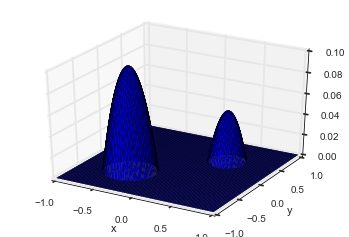

In [478]:
#plot the function to get a batter idea about it's shape

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1, 1, 1000)
Y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

** Stratified Sampling** divides the domain of the function, f(x), into 25 equally sized strata, then draws N/25 from each strata, where N is the number of samples we initally used for the basic MC approach. The mean value for each strata is then calculated and the integral of the function is the sum of these means. 

It is possible to have strata of different sizes and draw different numbers of samples from them. Given enough time and seeing the plot of f(x) above, I would have used smaller strata (drawing more points) from the peaks. 

In [479]:
start_time = time.time()
#stratified sampling (try changing num of strata)


# partition 2D space into strata
M_x = 5.0
M_y = 5.0

N = 10000
n_simulations = 1000


strat_estimates = np.zeros(n_simulations)

for simulation in range(n_simulations):

    xmax = 1.0
    xmin = -1.0
    ymax = 1.0
    ymin = -1.0

    # stratify with M*M regions
    step_x = (xmax-xmin )/M_x
    step_y = (ymax-ymin )/M_y
    xmin = -1.0
    xmax = xmin+ step_x

    # Ii sums up our results
    Ii = 0
    
    # loop over all strata
    for strata_x in np.arange(0,M_x):
        ymin = -1.0
        ymax = ymin+ step_y
        
        for strata_y in np.arange(0,M_y):
            # sample for this stratum
            x = np.random.uniform(low=xmin, high=xmax, size=1.0*N/(M_x**2))
            y = np.random.uniform(low=ymin, high=ymax, size=1.0*N/(M_y**2))
            f_xy = f(x,y)

            # update Ii with the additional stratum data
            Ii += (xmax-xmin)*(ymax-ymin)*np.mean(f_xy)
            # update bounds for next stratum
            ymin = ymin + step_y
            ymax = ymin + step_y
        xmin = xmin + step_x
        xmax = xmin + step_x

    #save stratified result from this iteration
    strat_estimates[simulation] = Ii

print "mean stratified sampling estimate = ", np.mean(strat_estimates)
print "std stratified sampling estimate = ", np.std(strat_estimates)
print("--- %s seconds ---" % (time.time() - start_time))


mean stratified sampling estimate =  0.0196393611109
std stratified sampling estimate =  0.000272929576343
--- 3.26607203484 seconds ---


/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/MacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


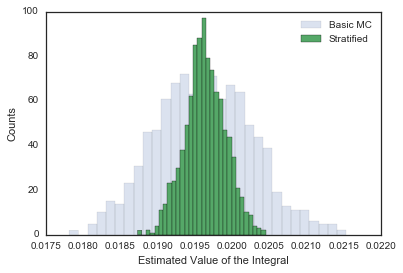

In [480]:
# visualize the improvement
plt.hist(mc_estimates,30, alpha=0.2, label=u'Basic MC');
plt.hist(strat_estimates,30, label = u'Stratified');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

** Control Variates ** defines a control variate function g(x) that is correlated with f(x). I chose this function to be the combination of 2 multivariate normal distributions. The multivariate normal distribution was chosen because it resembles the peaks we saw in the plot of f(x). The graph also allows us to set a reasonably close mean and variance for the multivariate normals. I chose a larger variance for the multivariate normal corresponding to the shorter peak, since it's lower hight means more spread (so that it sums up to 1 as a pdf should). So setting higher vairance gives sampling breadth for this peak.  $\tau$ was set to 0.5 because the sum of the volume under the 2 pdfs should be 2, and hence the expected value, $\tau= $ volume/area = 2/4 = 0.5. 

In [481]:
start_time = time.time()
#choose g(x,y) such that corr(f,g) is close to 1
xmax = 1.0
xmin = -1.0
ymax = 1.0
ymin = -1.0

N= 10000
n_simulations = 1000

n1 = multivariate_normal([0.4, 0.4], [[0.06, 0], [0, 0.06]]) # right small peak
n2 = multivariate_normal([-0.4, -0.4], [[0.01, 0], [0, 0.01]])

#define g function (pdf takes a 2D array)
g = lambda x,y: 0.5*n1.pdf(np.column_stack((x,y))) + 0.5*n2.pdf(np.column_stack((x,y)))

tau = 0.5
# We do estimates to get our estimation error
cv_estimates = np.zeros(n_simulations)
for simulation in range(n_simulations):

    x = np.random.uniform(low=xmin, high=xmax, size=N)
    y = np.random.uniform(low=xmin, high=xmax, size=N)
    
    # compute optimal value for b
    q = np.cov(g(x,y),f(x,y));  
    b = -q[0,1]/np.var(g(x,y));  

    # compute our estimate
    cv_estimates[simulation] = (xmax-xmin)*(np.mean(f(x,y)) + b *(np.mean(g(x,y)) -tau));
    
print "Mean control variates estimate: ", np.mean(cv_estimates)
print "Standard deviation control variates estimates: ", np.std(cv_estimates)
print("--- %s seconds ---" % (time.time() - start_time))

Mean control variates estimate:  0.0194774922691
Standard deviation control variates estimates:  0.000329200274118
--- 9.92850399017 seconds ---


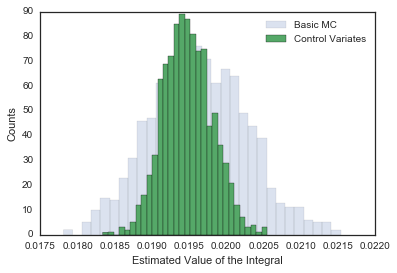

In [482]:
# visualize the improvement
plt.hist(mc_estimates,30, alpha=0.2, label=u'Basic MC');
plt.hist(cv_estimates,30, label = u'Control Variates');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

** Importance Sampling ** samples from a known distribution that covers the function of interest. I split the area of interest into two halfs, each containing one of the peaks so that I can sample independently from two different multivariate normals. Then the sum of the two values calculated is the complete integral.

In [503]:
start_time = time.time()
#importance sampling -     
# will integrate each peak seperately since that makes sampling easier

N= 10000
n_simulations = 1000

is_estimates = np.zeros(N)
for simulation in np.arange(n_simulations):

    # FIRST HALF - includes  larger peak and covers the area defined by 
    xmax = 0.0
    xmin = -1.0
    ymax = 1.0
    ymin = -1.0

    #parameters of the distribution we wish to sample from
    mean = [-0.4, -0.4]
    cov =  [[0.01, 0], [0, 0.01]]

    #normalized function
    n1 = multivariate_normal(mean, cov)
    p1 = lambda x,y: n1.pdf(np.column_stack((x,y)))

    #sample from multivariate normal
    x, y = np.random.multivariate_normal(mean, cov, N).T

    # make sure samples are in our range
    keep_x = np.zeros(N)
    keep_y = np.zeros(N)
    k= 0
    for i in range(N):
        if (x[i]<xmax) & (x[i]>xmin) &  (y[i]<ymax) & (y[i]>ymin):
            keep_x[k] = x[i]
            keep_y[k] = y[i]
            k +=1
    x, y = keep_x[:k-1] ,  keep_y[:k-1]

    # computing our estimates
    estimate_part1 = np.mean(f(x,y)/p1(x,y))
 

    # SECOND HALF - includes smaller peak
    xmax = 1.0
    xmin = 0.0
    ymax = 1.0
    ymin = -1.0

    #parameters of the distribution we wish to sample from
    mean = [0.4, 0.4]
    cov =  [[0.05, 0], [0, 0.05]]

    #normalized function
    n2 = multivariate_normal(mean, cov) # right small peak
    p2 = lambda x,y: n2.pdf(np.column_stack((x,y)))

    #sample from multivariate normal
    x, y = np.random.multivariate_normal(mean, cov, N).T
    
    # make sure samples are in our range
    keep_x = np.zeros(N)
    keep_y = np.zeros(N)
    k= 0
    for i in range(N):
        if (x[i]<xmax) & (x[i]>xmin) &  (y[i]<ymax) & (y[i]>ymin):
            keep_x[k] = x[i]
            keep_y[k] = y[i]
            k +=1
    x, y = keep_x[:k-1] ,  keep_y[:k-1]

    # computing our estimates
    estimate_part2 = np.mean(f(x,y)/p2(x,y))
 
    # add the two parts to get the total volume under the curve
    is_estimates[simulation] = estimate_part1 +estimate_part2

print "Mean importance sampling estimate: ", np.mean(is_estimates)
print "Standard deviation importance sampling estimates: ", np.std(is_estimates)
print("--- %s seconds ---" % (time.time() - start_time))

Mean importance sampling estimate:  3.97486410774e-06
Standard deviation importance sampling estimates:  0.000397466535956
--- 0.0705051422119 seconds ---


In [ ]:
# visualize the improvement
plt.hist(mc_estimates,30, alpha=0.2, label=u'Basic MC');
plt.hist(is_estimates,30, label = u'Importance Sampling');
plt.xlabel("Estimated Value of the Integral")
plt.ylabel("Counts")
plt.legend()
plt.show()

As the table below shows, when we compare the different methods, we find that the fastest is MC, while the most accurate is stratified sampling. 

|Variance Reducetion Method | Estimate | Error | Runtime (s) |
|---------------------------|----------|-------|-------------|
|None (basic MC)            | 0.01962  |0.00064| 0.89        |
|Stratified Sampling        | 0.01963  |0.00027| 3.26        |
|Control Variates           | 0.01948  |0.00033| 9.91        |
|Importance Sampling        | 0.01952  |0.00041| 44.51       |

Antithetic sampling is possible if the function we wish to estimate is monotonic, but the function of interest here clearly is not. However it is possible to combine antithetic sampling with stratification to reduce variance even more. This would be possible if we can get the function of interest to be monotonic within each strata. However, for this function it would be difficult to do so.